# Association Rules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv
Saving my_movies.csv to my_movies.csv


## 1. Books Dataset

In [3]:
books = pd.read_csv("book.csv")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


### Apriori Algorithm 

#### Association rules with 10% Support and 70% confidence

In [4]:
# Data preprocessing not required as it is already in transaction format
book = apriori(books, min_support=0.1, use_colnames=True)
book

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [5]:
rules = association_rules(book, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [6]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


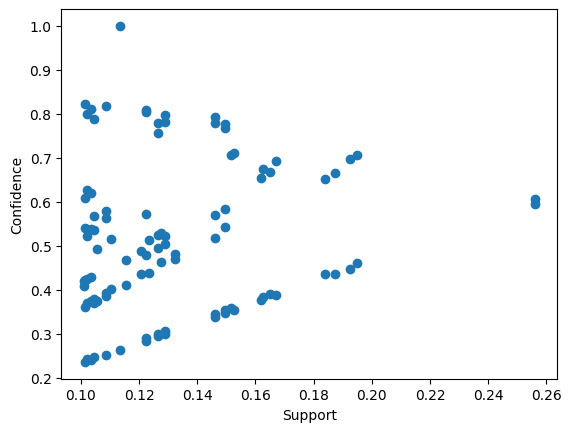

In [19]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

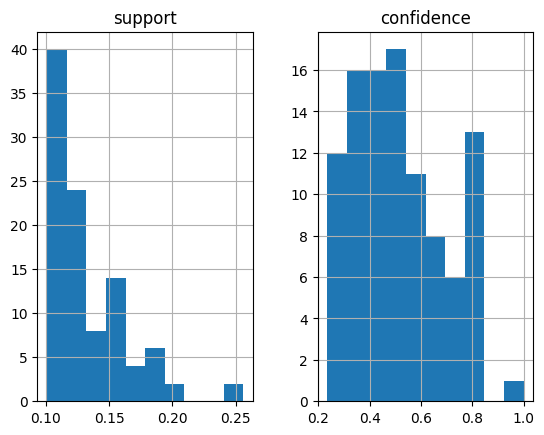

In [9]:
# visualization of obtained rule
rules[['support','confidence']].hist()

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

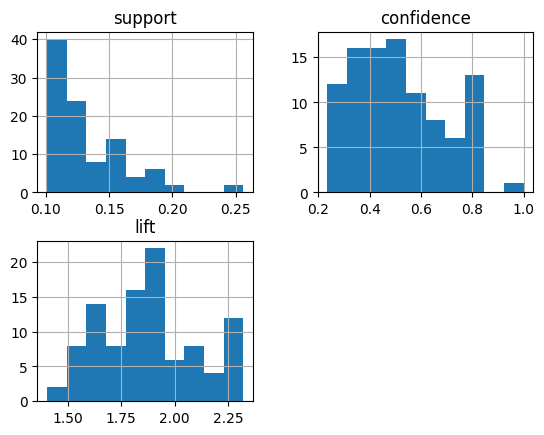

In [10]:
rules[['support','confidence','lift']].hist()

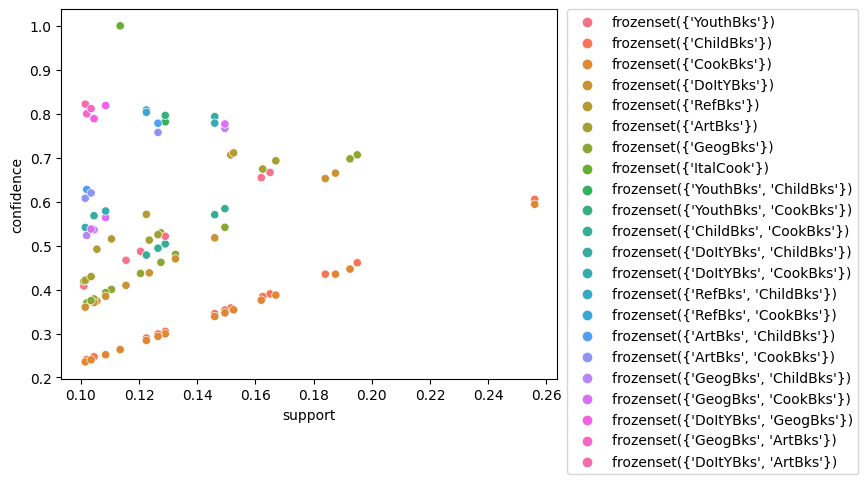

In [27]:
sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Association rules with 5% Support and 80% confidence

In [28]:
# Data preprocessing not required as it is already in transaction format
book1 = apriori(books, min_support=0.05, use_colnames=True)
book1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, DoItYBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)"
97,0.0650,"(ArtBks, GeogBks, DoItYBks, CookBks)"
98,0.0510,"(CookBks, DoItYBks, ChildBks, YouthBks, GeogBks)"


In [29]:
rules1 = association_rules(book1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(ArtBks, DoItYBks, GeogBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
658,(GeogBks),"(ChildBks, DoItYBks, CookBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
659,(DoItYBks),"(ChildBks, GeogBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
660,(ChildBks),"(ArtBks, DoItYBks, GeogBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


#### An leverage value of 0 indicates independence. Range will be [-1 1]
##### A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [30]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
511,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
510,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
508,"(ItalCook, GeogBks)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
513,"(ChildBks, CookBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
642,"(ArtBks, ChildBks, CookBks)","(DoItYBks, GeogBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271
651,"(DoItYBks, GeogBks)","(ArtBks, ChildBks, CookBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047
515,(ItalCook),"(CookBks, GeogBks, ChildBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488
506,"(CookBks, GeogBks, ChildBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307


In [31]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(ArtBks, DoItYBks, GeogBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
658,(GeogBks),"(ChildBks, DoItYBks, CookBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
659,(DoItYBks),"(ChildBks, GeogBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
660,(ChildBks),"(ArtBks, DoItYBks, GeogBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

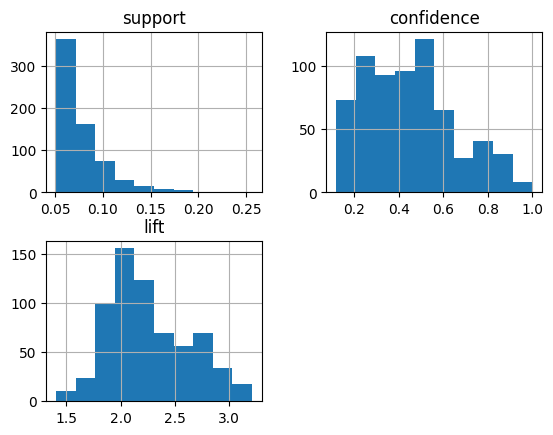

In [32]:
rules1[['support','confidence','lift']].hist()

<Axes: xlabel='support', ylabel='confidence'>

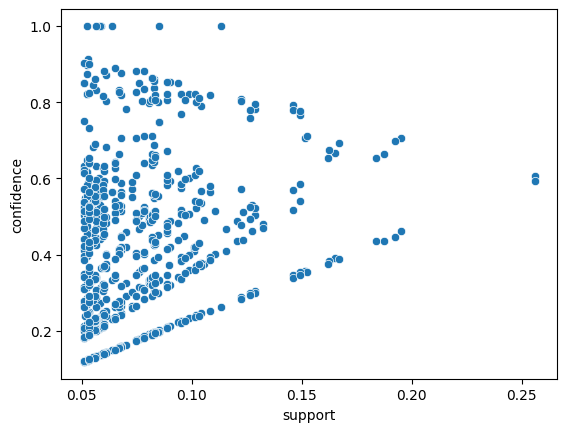

In [34]:
# visualization of obtained rule
sns.scatterplot(x=rules1['support'],y=rules1['confidence'])

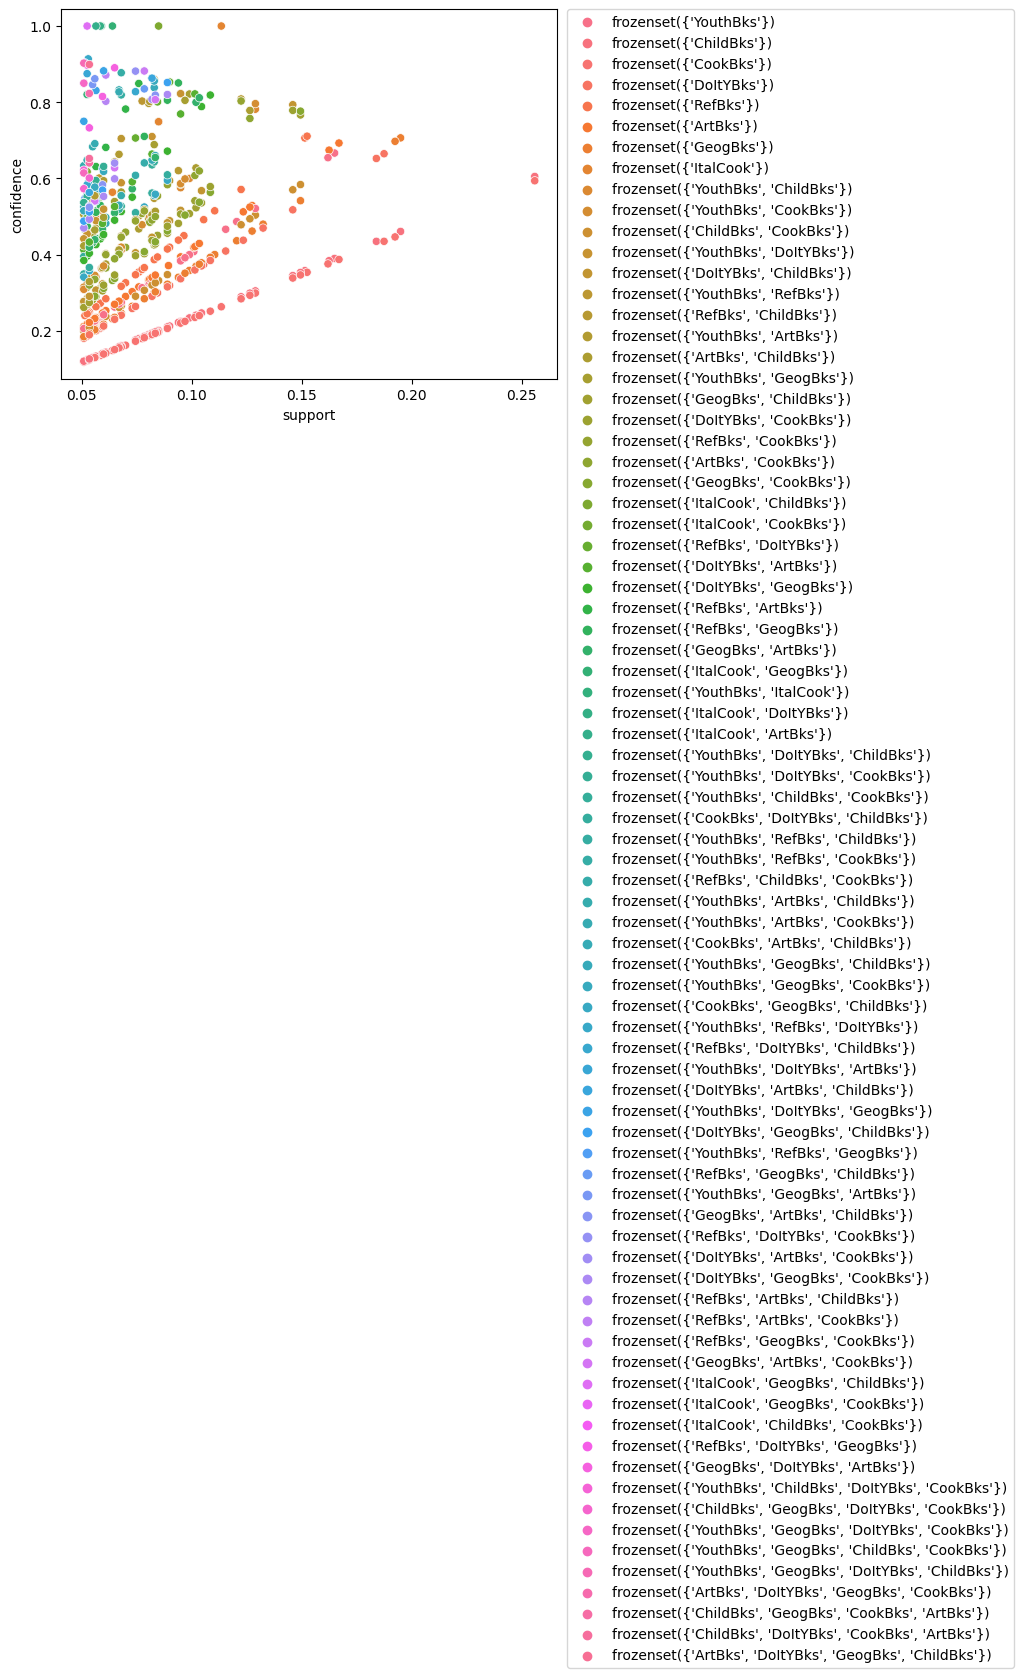

In [35]:
import seaborn as sns
sns.scatterplot(x='support', y='confidence', data=rules1, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

## 2. Movies Dataset

In [36]:
movie = pd.read_csv("my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [37]:
# Data preprocessing is required to convert into transaction format
movies = movie.drop(['V1','V2','V3','V4','V5'], axis = 1) 
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


#### Association rules with 20% Support and 60% confidence

In [38]:
apri = apriori(movies, min_support=0.2, use_colnames=True)
apri

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [39]:
rules2 = association_rules(apri, metric="lift", min_threshold=0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

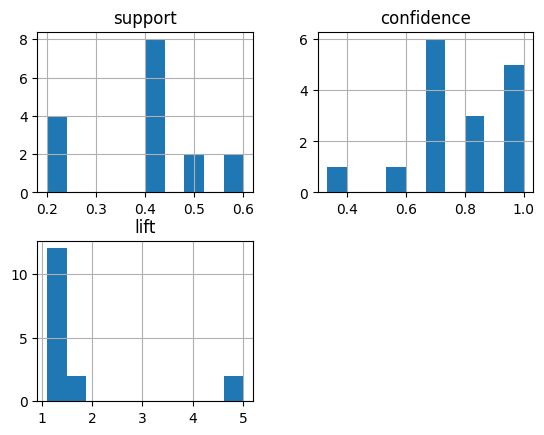

In [40]:
rules2[['support','confidence','lift']].hist()

<Axes: xlabel='support', ylabel='confidence'>

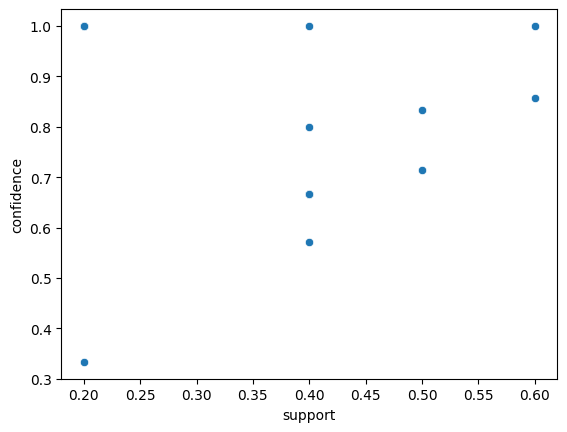

In [42]:
sns.scatterplot(x=rules2['support'],y=rules2['confidence'])

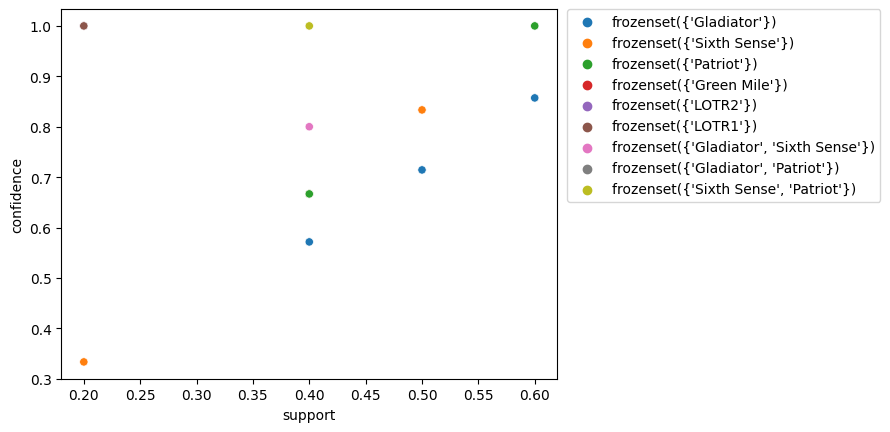

In [43]:
sns.scatterplot(x='support', y='confidence', data=rules2, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Association rules with 5% Support and 80% confidence

In [44]:
aprii = apriori(movies,min_support=0.05,use_colnames=True)
aprii

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [45]:
rules3=association_rules(aprii,metric='lift',min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(Harry Potter1, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Green Mile),"(LOTR2, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(Harry Potter1),"(LOTR2, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [46]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(Harry Potter1, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Green Mile),"(LOTR2, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
244,(Harry Potter1),"(LOTR2, Sixth Sense, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

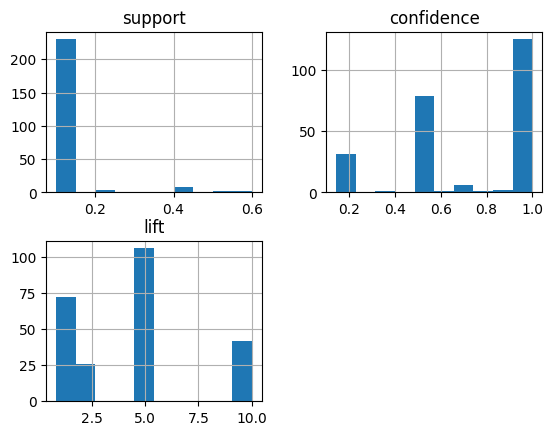

In [47]:
rules3[['support','confidence','lift']].hist()

<Axes: xlabel='support', ylabel='confidence'>

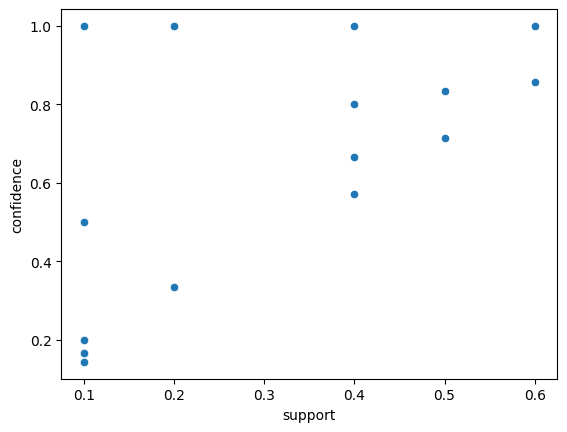

In [49]:
sns.scatterplot(x=rules3['support'],y=rules3['confidence'])

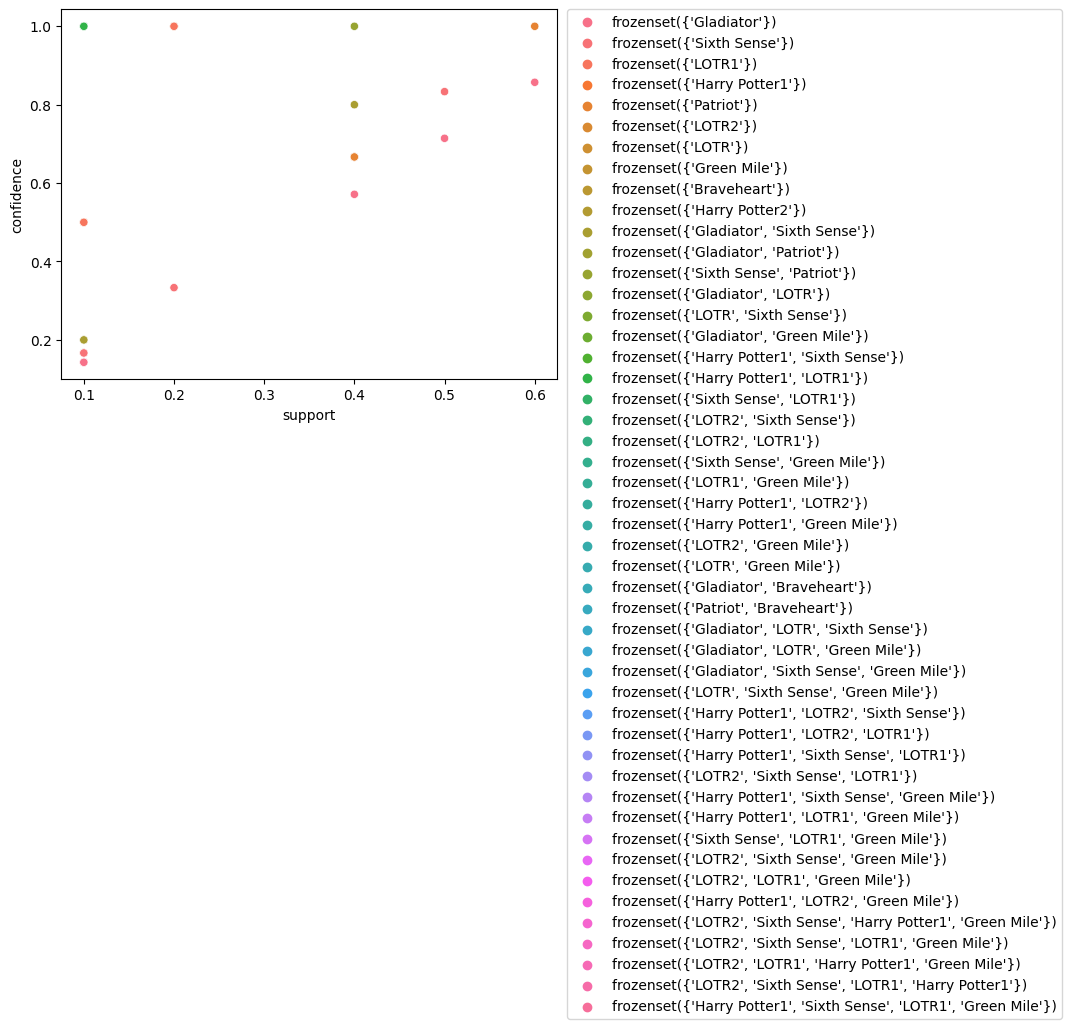

In [50]:
sns.scatterplot(x='support', y='confidence', data=rules3, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()